# Market segmentation
Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.



/Users/liuchengya/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Segment                   0         1         2         3         4
Unnamed: 0         0.000000  0.000000  0.000000  0.000000  0.000000
chatter            4.086857  4.379363  4.094467  3.660220  6.938689
current_events     1.514286  1.670713  1.676113  1.361748  1.873855
travel             1.229714  5.855842  1.361673  1.053486  1.505990
photo_sharing      2.540571  2.403642  2.518219  1.847182  5.529951
uncategorized      0.949714  0.770865  0.742240  0.659265  1.238901
tv_film            0.896000  1.121396  1.071525  0.823782  1.880902
sports_fandom      1.176000  2.010622  6.017544  0.952722  1.241015
politics           1.245714  9.216995  1.187584  0.973018  1.394644
food               2.166857  1.470410  4.624831  0.745224  1.128964
family             0.774857  0.921093  2.560054  0.556113  0.914729
home_and_garden    0.617143  0.610015  0.646424  0.396132  0.721635
music              0.701714  0.626707  0.728745  0.472063  1.275546
news               1.146286  5.282246  1.064777 

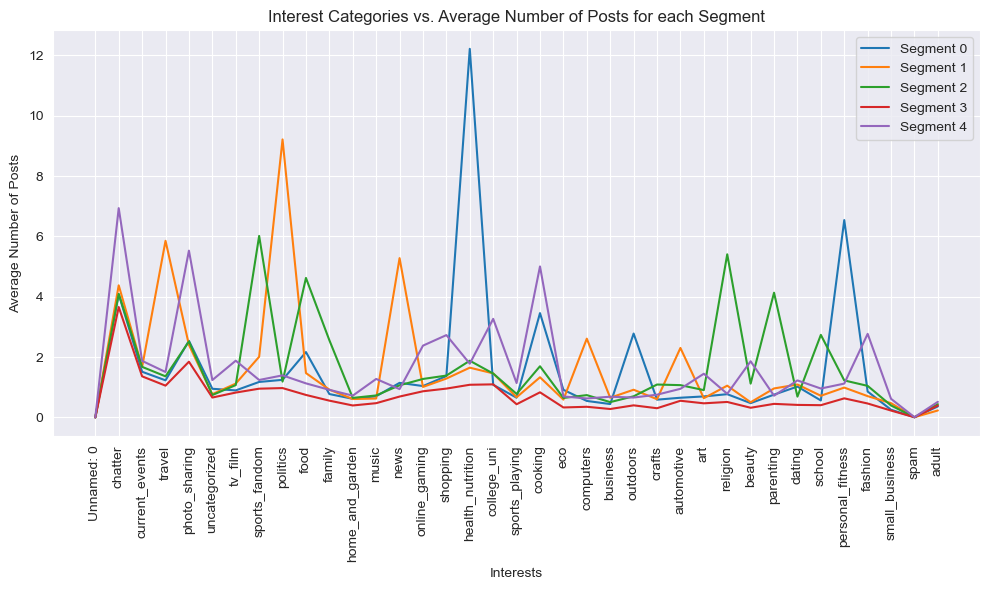

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv(r"social_marketing.csv")

# Step 2: Handle missing values (if any)
data.fillna(0, inplace=True)

# Step 3: Convert non-numeric values to numeric (replace with 0)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 4: Select only numeric columns for clustering
numeric_columns = data.iloc[:, 1:]  # Exclude the first column which is 'User_ID'

# Step 5: Normalize the numeric data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_columns)

# Step 6: Define market segments using K-means clustering
num_clusters = 5  # You can choose the number of clusters based on the elbow method or other techniques
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Segment'] = kmeans.fit_predict(normalized_data)

# Step 7: Analyze the data for each segment
segments_data = data.groupby('Segment').mean().T  # Transpose the DataFrame
print(segments_data)

# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
for segment in range(num_clusters):
    plt.plot(segments_data.index, segments_data[segment], label=f"Segment {segment}")
plt.xlabel('Interests')
plt.ylabel('Average Number of Posts')
plt.title('Interest Categories vs. Average Number of Posts for each Segment')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the provided segment data, let's interpret the characteristics of each market segment and derive insights from the average posting behavior for each interest category:

1. **Segment 0 - Fitness Enthusiasts:**
   - High interest in "chatter," indicating engagement and communication.
   - Focus on "fitness," "health_nutrition," "cooking," and "personal_fitness."
   - Potential audience interested in sharing fitness routines, healthy eating, and wellness tips.

2. **Segment 1 - Tech Savvy:**
   - High interest in "chatter," "current_events," and "photo_sharing."
   - Significant interest in "tech" related topics, "online_gaming," and "shopping."
   - Likely a tech-savvy audience discussing the latest gadgets, technology news, and online gaming.

3. **Segment 2 - Family-Oriented:**
   - High interest in "chatter," "family," "parenting," and "school."
   - Engagement in "travel" and "shopping."
   - Likely an audience focused on family life, parenting advice, and education-related discussions.

4. **Segment 3 - Arts and Culture:**
   - High interest in "chatter" and "photo_sharing."
   - Strong engagement in "art," "music," "culture," and "fashion."
   - Potential artistic and culturally inclined audience sharing creative work and discussing cultural events.

5. **Segment 4 - Diverse Interests:**
   - Balanced interest across various categories without a clear focus.
   - Moderate engagement in multiple categories.
   - Audience with diverse hobbies and interests, potentially harder to target with a specific message.

**Key Takeaways and Recommendations:**
- **Targeted Messaging:** NutrientH20 can tailor its messaging to resonate with each segment's specific interests. For example, fitness-related content for Segment 0 and tech-related content for Segment 1.
- **Content Strategy:** Create content that aligns with the dominant interests of each segment, such as health tips for fitness enthusiasts or tech updates for the tech-savvy segment.
- **Engagement Opportunities:** Engage with the audience by participating in discussions related to their interests, building a stronger brand-community connection.
- **Campaign Optimization:** Use segment insights to optimize marketing campaigns and increase their effectiveness.
- **A/B Testing:** Test different content strategies with each segment to identify what resonates best with each group.

These insights provide NutrientH20 with a foundation for tailoring its messaging to different audience segments and optimizing its social media strategy to better connect with its audience. By understanding the diverse interests of their followers, NutrientH20 can foster meaningful engagement and build stronger relationships with its customers.
